# LAB 2 Part B - Deep Computer Vision (Minimal Pytorch)

The objective of this lab is to understand the fundamentals of Pytorch with the most minimal convolutional neural network we can make from scratch before approaching other deep learning architectures

#### Project Info

 ->Copyright 2024 Luis R Soenksen

 ->Last Update: March 24, 2024

```
**Licensed under the Apache License, Version 2.0**
You may not use this file except in compliance with the License. You may obtain a copy of the License at
https://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.
```

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Compatible with Google Colab</a>      
    </td>
  <td>
    <a target="_blank" href="https://github.com/lrsoenksen/"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Visit my GitHub</a>
  </td>
  <td>
    <a href="https://pytorch.org"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/488px-PyTorch_logo_black.svg.png" width="150px"/>Built with Pytorch </a>
  </td>
</table>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import ExponentialLR

# Get CPU or GPU device for training
device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device)

In [84]:
'''
Fill the in the missing code marked as # TO DO
'''
# Random seed for reproducibility
seed = 7
torch.manual_seed(seed)

# Save the model at the end?
save_model = False

# Batch sizes for training and testing
batch_size = 16                                                 #TO DO
test_batch_size = 14

# Training epochs
n_epochs = 10                                                  #TO DO

# Learning rate
learning_rate = 0.01                                             #TO DO

# Decay rate for adjusting the learning rate
gamma = 0.7

# How many batches before logging training status
log_interval = 10

# Number of target classes in the MNIST data
num_classes = 10

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': test_batch_size}

# CUDA settings
if torch.cuda.is_available():
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

In [85]:
# The scaled mean and standard deviation of the MNIST dataset (precalculated)
data_mean = 0.1307
data_std = 0.3081

# Convert input images to tensors and normalize
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
    ])

# Get the MNIST data from torchvision
train = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
test = datasets.MNIST('../data', train=False,
                    transform=transform)

# Define the data loaders that will handle fetching of data
train_loader = torch.utils.data.DataLoader(train, **train_kwargs)
test_loader = torch.utils.data.DataLoader(test, **test_kwargs)

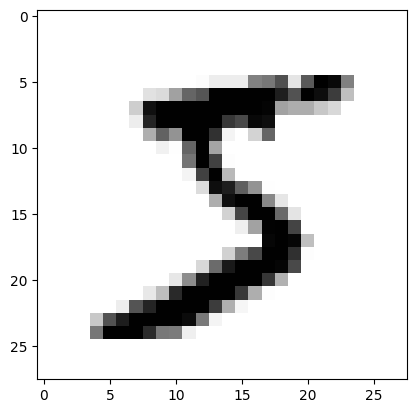

In [78]:
# Display single sample of dataset
import matplotlib.pyplot as plt
plt.imshow(train.data[0].numpy().squeeze(), cmap='gray_r') # squeeze() removes dims of length one

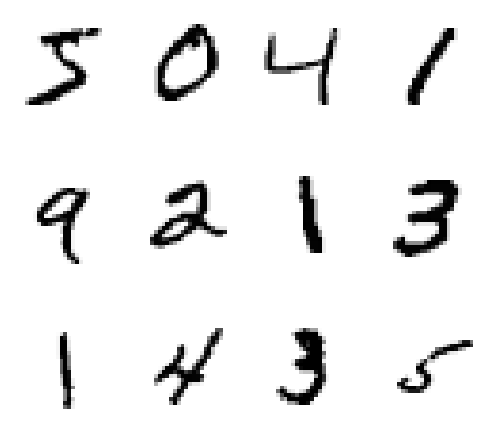

In [79]:
# Display various examples of dataset sample
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(train.data[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [86]:
# Define the architecture of the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding='valid')
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding='valid')
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.softmax(x, dim=1)
        return output

In [87]:
'''
Fill the in the missing code marked as # TO DO
'''
def train(model, device, train_loader, optimizer, epoch, log_interval):
    model.train()
    loss_fn = torch.nn.CrossEntropyLoss()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()               #set gradients to zero for next iteration            #TO DO
        output = model(data)                                                            #TO DO
        loss = loss_fn(output, target) #calculate cross entropy loss                        #TO DO
        loss.backward()                # compute gradients                                  #TO DO
        optimizer.step()                # update model parameters                            #TO DO
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [88]:
'''
Fill the in the missing code marked as # TO DO
'''
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # sum up batch loss
            test_loss += F.cross_entropy(output, target, reduction='sum').item()  #should be cross_entropy instead of nll_loss
            # get the index of the max probability
            pred = output.argmax(dim=1, keepdim=True)                                                           #TO DO
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
'''
Fill the in the missing code marked as # TO DO
'''
# Send the model to the device (CPU or GPU)
model = Net().to(device)

# Define the optimizer to user for gradient descent
optimizer = optim.Adadelta(model.parameters(), lr=learning_rate)

# Shrinks the learning rate by gamma every step_size
scheduler = ExponentialLR(optimizer, gamma=gamma)

# Train the model
for epoch in range(1, n_epochs + 1):
    model.train()
    train(model, device, train_loader, optimizer, epoch, log_interval=100)                                                      #call train()          #TO DO
    model.eval()
    test(model, device, test_loader)                                                      #call test()           #TO DO
    scheduler.step()                                                    #adjust learning rate  #TO DO

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303050
Train Epoch: 1 [1600/60000 (3%)]	Loss: 2.300311
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.295587
Train Epoch: 1 [4800/60000 (8%)]	Loss: 2.293747
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.287614
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.288661
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.278777
Train Epoch: 1 [11200/60000 (19%)]	Loss: 2.268352
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.183711
Train Epoch: 1 [14400/60000 (24%)]	Loss: 2.211418
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.176856
Train Epoch: 1 [17600/60000 (29%)]	Loss: 2.140721
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.101581
Train Epoch: 1 [20800/60000 (35%)]	Loss: 2.047981
Train Epoch: 1 [22400/60000 (37%)]	Loss: 1.981440
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.929249
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.810978
Train Epoch: 1 [27200/60000 (45%)]	Loss: 1.760763
Train Epoch: 1 [28800/60000 (48%)]	Loss: 1.733452
Train Epoch: 1 [30400/60000 (51%)]	Loss: 1.935282
Train Epoch: 1

In [27]:
if save_model:
    torch.save(model.state_dict(), "mnist_cnn_pytorch.ckpt")

In [28]:
'''
Fill the in the missing code marked as # TO DO
'''
import matplotlib.pyplot as plt
def visualize_and_predict(model, device, data_loader):
    model.eval()
    with torch.no_grad():
        # Extract the first batch of images and labels
        data, target = next(iter(data_loader))
        # Select the first image and label
        img, label = data[0], target[0]

        # Visualize the image
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f'Actual Label: {label.item()}')
        plt.show()

        # Run inference
        img = img.to(device)           #specify device for input tensor                                          #TO DO
        img = img.unsqueeze(0)          #Add batch dimension to input tensor                                     #TO DO
        output = model(img)        #Add batch dimension to input tensor and pass to model                    #TO DO
        pred = output.argmax(dim=1,keepdim=True)          #get predicted class using argmax()                                       #TO DO

        print(f'Predicted Label: {pred.item()}')

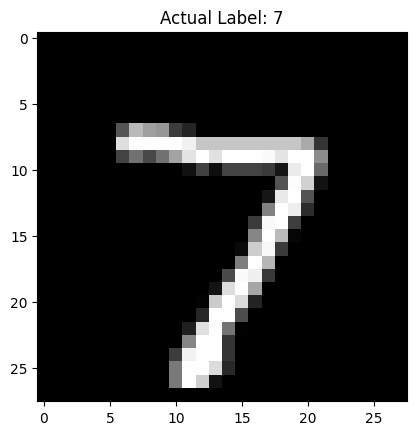

Predicted Label: 7


In [30]:
visualize_and_predict(model, device, test_loader)

------------------------------------------------------
------------------------------------------------------